# Creating a correlation table for economic features

In [1]:
# Import dependencies
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in dataframe with economic features without NA values
df = pd.read_csv('../Raw_Data/dataset_na_dropped.csv')
df.head()

,year,state,population_million,education_million,welfare_million,crime_rate,unemployment_rate,divorce_rate_per_1000_people,homeownership_rate,minimum_wage_effective,CPI_Average,inflation_rate,avg_wage_index,poverty_rate
0,1976,National,216.945,107290.0,72155.2,467.8,7.786562,5.0,7.79,2.226667,56.9,5.7,9226.48,14.10
1,1977,National,219.307,115893.0,83417.8,475.9,7.132505,5.1,7.13,2.226667,60.6,6.5,9779.44,13.92
2,1978,National,221.694,128541.0,81037.9,497.8,6.134198,5.2,6.13,2.226667,65.2,7.6,10556.03,13.43
3,1979,National,224.107,140169.0,83691.3,548.9,5.923827,5.3,5.92,2.910000,72.6,11.3,11479.46,13.33
4,1980,National,226.546,153686.0,108251.7,596.6,7.255717,5.2,7.26,3.110196,82.4,13.5,12513.46,14.65


### Convert to per capita values,  drop columns

In [3]:
df['education_per_capita'] = df.education_million / df.population_million
df['welfare_per_capita'] = df.welfare_million / df.population_million

# columns to be dropped
columns_to_drop = ['year','population_million', 'education_million', 'welfare_million']


# reorganize columns by decreasing value of correlation to poverty_rate

column_order =['year', 'state','poverty_rate','unemployment_rate','divorce_rate_per_1000_people',
               'crime_rate','inflation_rate', 'welfare_per_capita', 'minimum_wage_effective', 'CPI_Average', 
               'avg_wage_index','education_per_capita','homeownership_rate',
               'population_million', 'education_million','welfare_million'      
       ]
df = df[column_order]

## Correlation matrix and heatmap for the entire dataset

In [4]:
# Creating correlation matrix and formatting to two decimals
correlationMatrix = df.drop(columns = columns_to_drop).corr()
# pd.options.display.float_format = '{:.2f}'.format
correlationMatrix = np.round(correlationMatrix, decimals = 2)
correlationMatrix

,poverty_rate,unemployment_rate,divorce_rate_per_1000_people,crime_rate,inflation_rate,welfare_per_capita,minimum_wage_effective,CPI_Average,avg_wage_index,education_per_capita,homeownership_rate
poverty_rate,1.00,0.48,0.43,0.40,0.25,-0.24,-0.39,-0.43,-0.43,-0.50,-0.14
unemployment_rate,0.48,1.00,0.19,0.20,-0.03,0.23,-0.06,-0.13,-0.15,-0.11,-0.09
divorce_rate_per_1000_people,0.43,0.19,1.00,0.24,0.60,-0.36,-0.92,-0.99,-1.00,-0.88,-0.09
crime_rate,0.40,0.20,0.24,1.00,0.15,-0.11,-0.24,-0.23,-0.24,-0.25,-0.18
inflation_rate,0.25,-0.03,0.60,0.15,1.00,-0.20,-0.59,-0.60,-0.59,-0.53,-0.12
welfare_per_capita,-0.24,0.23,-0.36,-0.11,-0.20,1.00,0.50,0.39,0.37,0.55,-0.33
minimum_wage_effective,-0.39,-0.06,-0.92,-0.24,-0.59,0.50,1.00,0.93,0.93,0.86,0.03
CPI_Average,-0.43,-0.13,-0.99,-0.23,-0.60,0.39,0.93,1.00,1.00,0.89,0.10
avg_wage_index,-0.43,-0.15,-1.00,-0.24,-0.59,0.37,0.93,1.00,1.00,0.88,0.09
education_per_capita,-0.50,-0.11,-0.88,-0.25,-0.53,0.55,0.86,0.89,0.88,1.00,0.06


HEATMAP


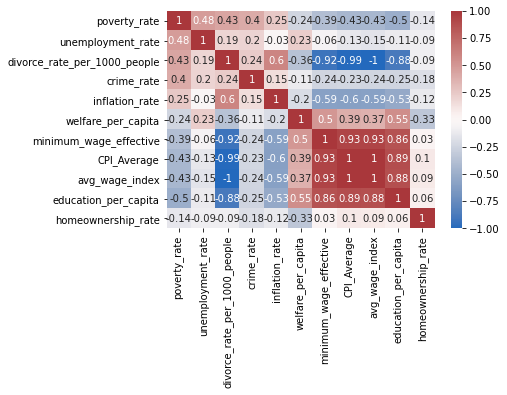

In [5]:
# Plotting heatmap of correlation matrix
print('HEATMAP')
ax = sn.heatmap(correlationMatrix, annot = True, cmap = 'vlag')
#ax.set_title = 'HEATMAP'
plt.show()

## Correlation matrix and heatmap for a few states

------National-------


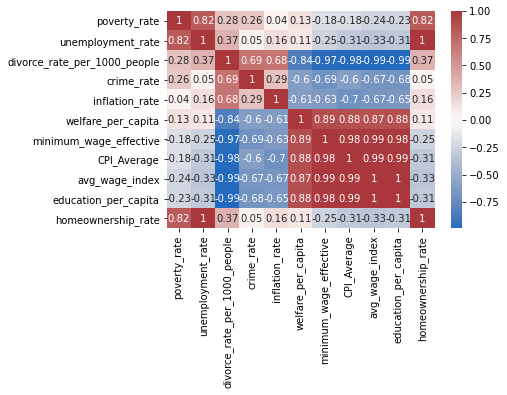

------California-------


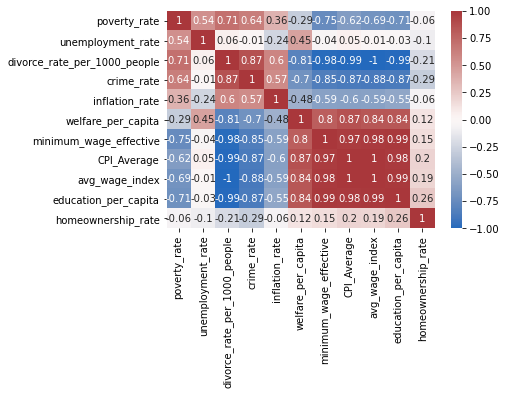

------Georgia-------


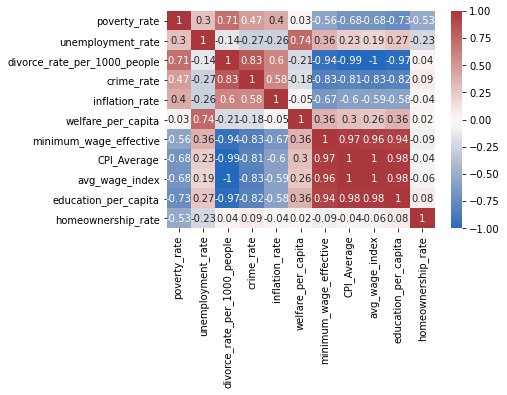

------Iowa-------


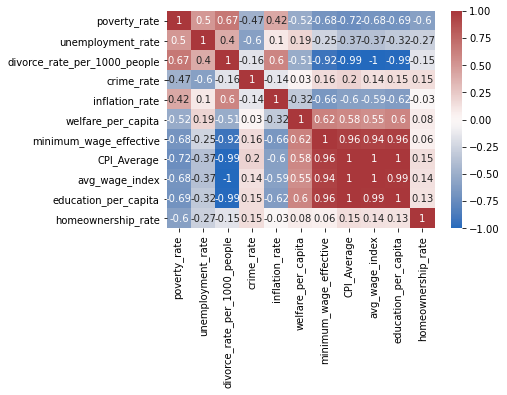

------Maryland-------


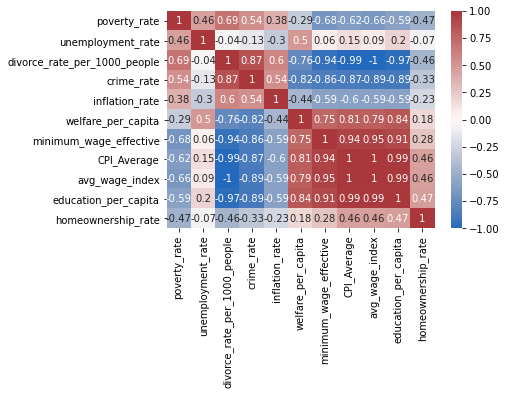

------Missouri-------


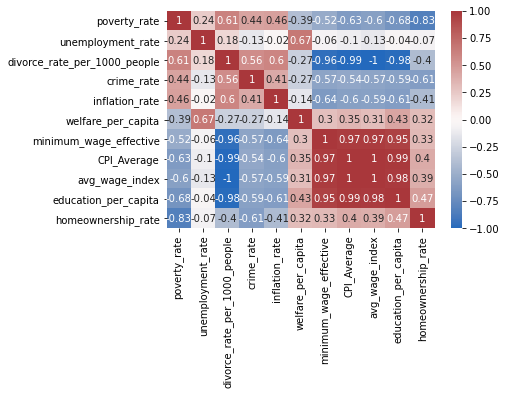

------New Jersey-------


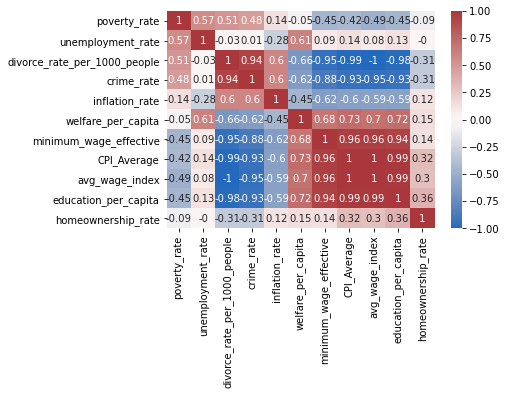

------Ohio-------


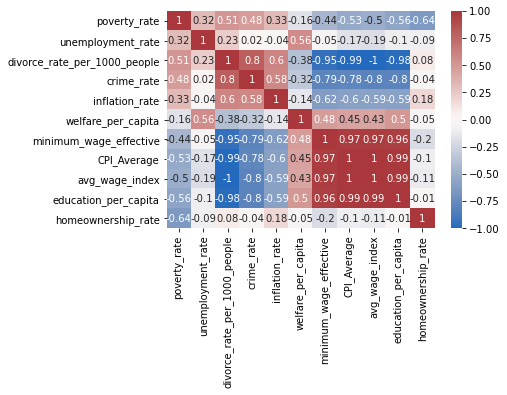

------South Carolina-------


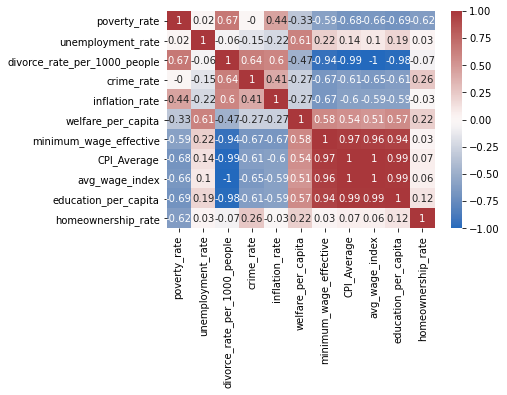

------Vermont-------


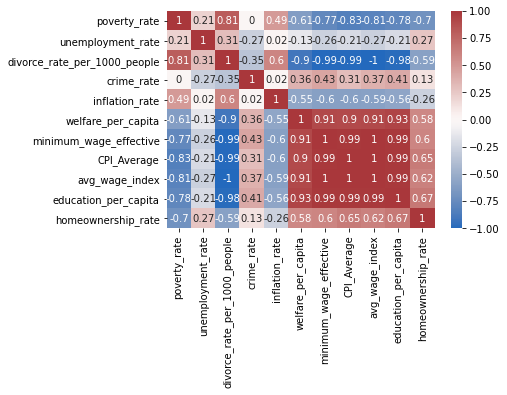

------Wyoming-------


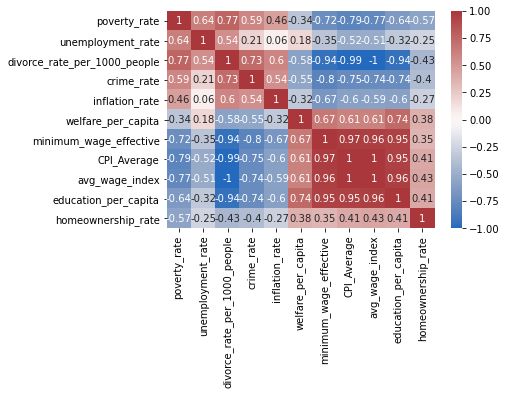

In [6]:
#  step: sampling rate from list of states
step = 5

state_list = df['state'].unique().tolist()
for index, state in enumerate(state_list):
    if index % step == 0 :
        print(f'------{state}-------')
        # Creating correlation matrix and formatting to two decimals
        cMatrix = df.loc[df['state']==state].drop(columns = columns_to_drop).corr()
        # pd.options.display.float_format = '{:.2f}'.format
        cMatrix = np.round(cMatrix, decimals = 2)
        sn.heatmap(cMatrix, annot = True, cmap = 'vlag')
        plt.show()

## Get 1 table with all the correlation values to 'poverty_rate'

In [7]:
corr_values_df = correlationMatrix[['poverty_rate']]
corr_values_df.columns = ['All_values']
state_list = df['state'].unique().tolist()
for state in state_list:
    # Creating correlation matrix and formatting to two decimals
    cMatrix2 = df.loc[df['state']==state].drop(columns = columns_to_drop).corr()
    # pd.options.display.float_format = '{:.2f}'.format
    cMatrix2 = np.round(cMatrix2, decimals = 2)
    corr_values_df[state] = cMatrix2['poverty_rate']

corr_values_df= corr_values_df.transpose()
corr_values_df.drop(columns=['poverty_rate'], inplace=True)
corr_values_df

C:\Users\jvo1\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,unemployment_rate,divorce_rate_per_1000_people,crime_rate,inflation_rate,welfare_per_capita,minimum_wage_effective,CPI_Average,avg_wage_index,education_per_capita,homeownership_rate
All_values,0.48,0.43,0.40,0.25,-0.24,-0.39,-0.43,-0.43,-0.50,-0.14
National,0.82,0.28,0.26,0.04,0.13,-0.18,-0.18,-0.24,-0.23,0.82
Alabama,0.47,0.73,0.48,0.51,-0.47,-0.72,-0.77,-0.73,-0.76,-0.65
Alaska,0.80,0.69,-0.57,0.51,-0.43,-0.66,-0.71,-0.68,-0.49,-0.65
Arizona,0.50,0.32,0.04,0.11,-0.24,-0.38,-0.21,-0.28,-0.08,0.15
Arkansas,0.60,0.74,-0.44,0.47,-0.33,-0.63,-0.77,-0.73,-0.74,-0.18
California,0.54,0.71,0.64,0.36,-0.29,-0.75,-0.62,-0.69,-0.71,-0.06
Colorado,0.56,0.76,0.60,0.58,-0.16,-0.70,-0.76,-0.74,-0.74,-0.48
Connecticut,0.32,-0.03,-0.07,-0.26,0.10,-0.03,0.11,0.03,0.03,0.23
Delaware,0.26,0.52,-0.48,0.26,-0.40,-0.49,-0.50,-0.49,-0.44,-0.49


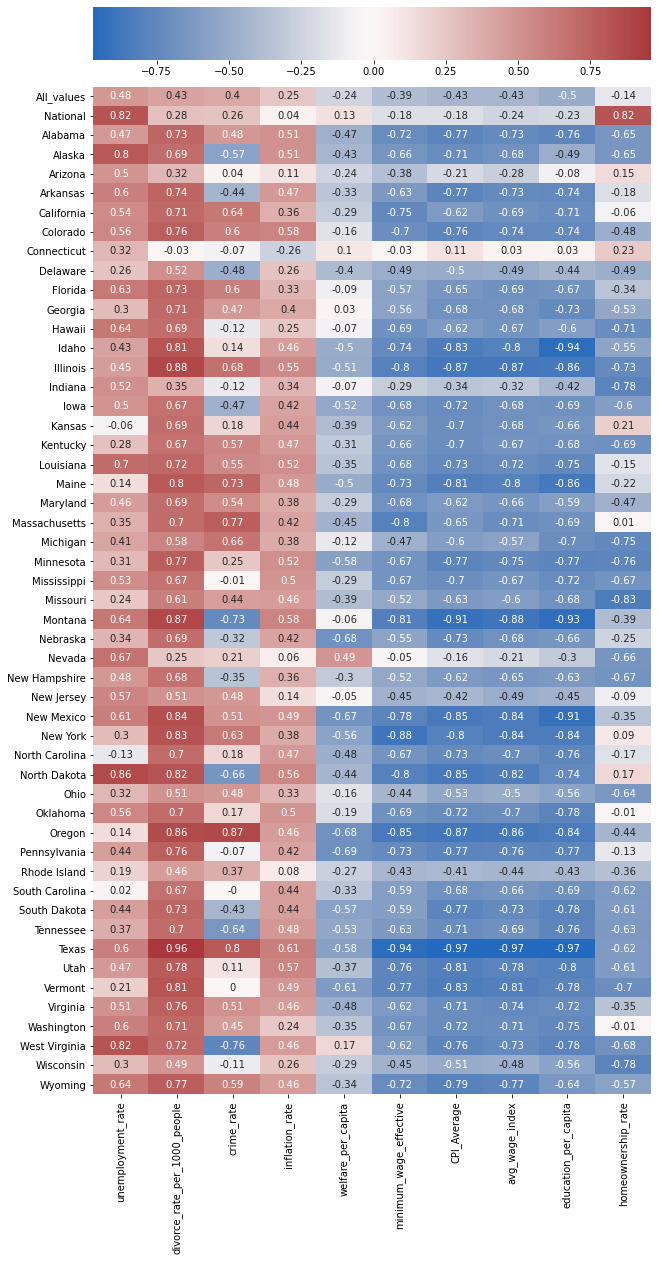

In [8]:
grid_kws = {"height_ratios": (.05, .95), "hspace": .05}

fig, (cbar_ax, ax) = plt.subplots(2, figsize=(10, 20), gridspec_kw=grid_kws)
ax= sn.heatmap(corr_values_df, ax=ax, cbar_ax= cbar_ax, cbar_kws={'orientation':'horizontal'},
               annot = True, cmap = 'vlag')
plt.show()
